
PyTorch es un marco de aprendizaje profundo que proporciona una interfaz flexible para el desarrollo de modelos de inteligencia artificial. PyTorch puede ejecutarse tanto en CPU (Unidad Central de Procesamiento) como en GPU (Unidad de Procesamiento Gráfico), lo que brinda a los desarrolladores la flexibilidad de elegir la plataforma de hardware que mejor se adapte a sus necesidades de computación

Los tensores son muy parecidos a los arrays de NumPy; sin embargo, es crucial destacar que los tensores tienen la capacidad de ejecutarse en una GPU. Recordemos que una GPU se diferencia de una CPU en que la GPU, o Unidad de Procesamiento Gráfico, está especialmente diseñada para realizar operaciones en paralelo de manera eficiente. A diferencia de una CPU, que se centra en tareas más generales y secuenciales, la GPU puede procesar grandes cantidades de datos simultáneamente, lo que resulta en un rendimiento significativamente mejorado para operaciones matriciales y de tensores. Por lo tanto, al utilizar tensores en una GPU, podemos acelerar de manera considerable el procesamiento de información, siendo especialmente beneficioso en aplicaciones de aprendizaje profundo y otras tareas computacionales intensivas.

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
!git clone https://github.com/katbl23/Red_Neuronal_Pytorch_clasificacion_de_ropa


Cloning into 'Red_Neuronal_Pytorch_clasificacion_de_ropa'...


In [2]:
#Importando librerias
import torch
import numpy as np

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [4]:
import os
from torch import nn
from torchvision import datasets, transforms

#Inicializar Tensores


En PyTorch, se pueden inicializar tensores de diversas maneras.

##Inicialización a partir de datos existentes:

In [5]:
data=[[1,2,3],[4,5,6]]

In [6]:
type(data)

list

In [7]:
data[1]

[4, 5, 6]

In [8]:
x_data=torch.tensor(data)
x_data

tensor([[1, 2, 3],
        [4, 5, 6]])

In [9]:
type(x_data)

torch.Tensor

In [10]:
len(x_data)

2

##Inicializacion a partir de numpy

In [11]:
np_array=np.array(data)

In [12]:
np_array

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
x_np_array=torch.tensor(np_array)

In [14]:
x_np_array

tensor([[1, 2, 3],
        [4, 5, 6]])

##Inicialización con un rango específico

In [15]:
tensor_range=torch.arange(0,10,2)

In [16]:
tensor_range

tensor([0, 2, 4, 6, 8])

#Atributo de un tensor


los tensores son objetos versátiles con varios atributos que pueden proporcionar información sobre su forma, tipo de datos, dispositivo de almacenamiento, entre otros.

In [17]:
tensor=torch.rand(3,4)

In [18]:
tensor

tensor([[0.1991, 0.9111, 0.4136, 0.6136],
        [0.2318, 0.5777, 0.7370, 0.2083],
        [0.7873, 0.3222, 0.2565, 0.1130]])

In [19]:
tensor.shape

torch.Size([3, 4])

Este atributo devuelve un objeto que describe la forma (dimensiones) del tensor

In [20]:
tensor.dtype

torch.float32

Este atributo indica el tipo de datos de los elementos dentro del tensor

In [21]:
tensor.device

device(type='cpu')

Este atributo muestra el dispositivo en el que se almacena el tensor, ya sea en la CPU o en una GPU


Las CPUs pueden tener hasta 16 núcleos, que son unidades encargadas de llevar a cabo las operaciones de computación real. Cada núcleo procesa tareas de manera secuencial, es decir, una tarea a la vez.

Por otro lado, las GPUs cuentan con miles de núcleos. Estos núcleos de la GPU realizan cálculos mediante el procesamiento en paralelo, dividiendo las tareas y procesándolas a través de los distintos núcleos. Esta capacidad es lo que hace que las GPUs sean generalmente más rápidas que las CPUs. Las GPUs muestran un rendimiento óptimo al trabajar con conjuntos de datos extensos en comparación con conjuntos de datos más pequeños

#Operaciones de tensores

In [22]:
tensor=torch.randint(0,20,(3,3))
tensor

tensor([[13, 10, 14],
        [11,  0,  8],
        [17, 14,  6]])

In [23]:
len(tensor)

3

In [24]:
tensor[0]

tensor([13, 10, 14])

In [25]:
tensor[0:1,0:3]

tensor([[13, 10, 14]])

##Joining tensor

torch.cat es una función en PyTorch que se utiliza para concatenar tensores a lo largo de un eje específico. El nombre "cat" proviene de "concatenate" (concatenar en inglés). Esta función es útil cuando necesitas combinar tensores a lo largo de una dimensión existente.

In [26]:
t1=torch.cat([tensor,tensor],dim=1)

In [27]:
t1

tensor([[13, 10, 14, 13, 10, 14],
        [11,  0,  8, 11,  0,  8],
        [17, 14,  6, 17, 14,  6]])

In [28]:
len(t1)

3

In [29]:
t2=torch.cat([tensor,tensor],dim=0)

In [30]:
t2

tensor([[13, 10, 14],
        [11,  0,  8],
        [17, 14,  6],
        [13, 10, 14],
        [11,  0,  8],
        [17, 14,  6]])

In [31]:
agg=t2.sum()
agg

tensor(186)

In [32]:
agg_item=agg.item()
agg_item

186

#Loading Dataset

Fashion-MNIST es una colección de imágenes de artículos de Zalando que consta de 60,000 ejemplos de entrenamiento y 10,000 ejemplos de prueba. Cada ejemplo incluye una imagen en escala de grises de 28×28 píxeles y una etiqueta correspondiente a una de las 10 clases.

Cada imagen tiene una altura y ancho de 28 píxeles, lo que da un total de 784 píxeles.
Las 10 clases indican el tipo de imagen, como por ejemplo: camiseta/top, pantalón, pulóver, vestido, bolso, bota, etc.
Los píxeles en escala de grises tienen valores que oscilan entre 0 y 255, representando la intensidad de las imágenes en blanco y negro. El valor de intensidad aumenta de blanco a negro. Por ejemplo, el color blanco se representa con un valor de 0, mientras que el color negro se representa con un valor de 255.

In [33]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 7956140.91it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 139305.90it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2626620.66it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7988263.78it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



root="data" especifica la ruta donde se almacenarán o buscarán los datos. En este caso, se utilizará un directorio llamado "data". Si este directorio no existe, se descargará el conjunto de datos y se almacenará en este directorio.

train=False indica que se está cargando el conjunto de datos de prueba (test) en lugar del conjunto de entrenamiento. Cuando se establece en False, carga los datos de prueba. Si se establece en True, cargaría los datos de entrenamiento.

download=True indica que, si los datos no están disponibles localmente en la ubicación especificada por root, deben descargarse. Si los datos ya están presentes en la ubicación especificada, no se realizará ninguna descarga.

transform=ToTensor() especifica la transformación que se aplicará a cada muestra del conjunto de datos. En este caso, se utiliza ToTensor(), que convierte las imágenes en tensores de PyTorch. Las imágenes originales están en formato de imagen, y ToTensor() las convierte en tensores, lo cual es necesario para trabajar con PyTorch.

##Iterar y visualizar

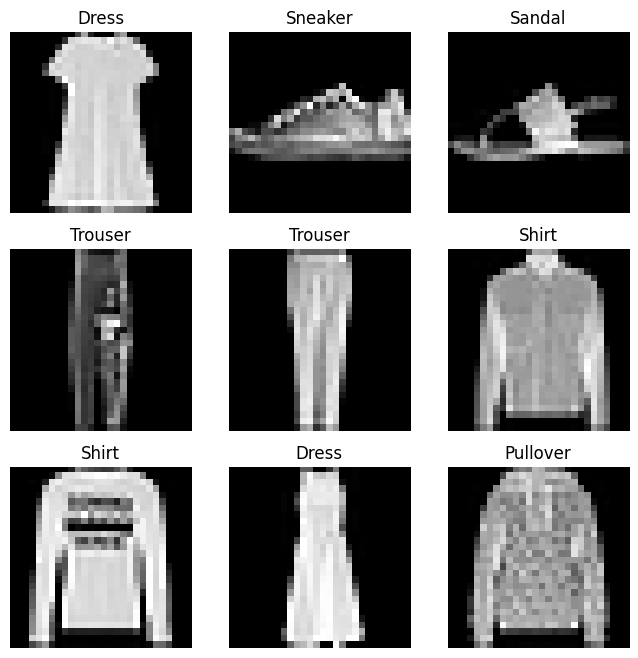

In [34]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    imagen_aleatoria = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[imagen_aleatoria]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

##Data Loader

Un elemento DataSet está diseñado para la recuperación de elementos de datos individuales, mientras que un elemento DataLoader está diseñado para trabajar con lotes de datos.

Para utilizar el DataLoader, necesitamos configurar los siguientes parámetros:

data: los datos de entrenamiento que se utilizarán para entrenar el modelo y los datos de prueba para evaluar el modelo.

batch size: el número de registros que se procesarán en cada lote.

shuffle: reorganiza de manera aleatoria la muestra de datos por índices.

In [35]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))

In [36]:
train_dataloader

In [37]:
train_features[0].size()

torch.Size([1, 28, 28])

In [38]:
train_labels.size()

torch.Size([64])

In [39]:
train_labels

tensor([2, 8, 9, 6, 0, 2, 7, 8, 1, 5, 3, 8, 1, 3, 4, 1, 4, 0, 6, 2, 6, 7, 5, 4,
        3, 7, 9, 7, 5, 2, 3, 3, 2, 2, 4, 5, 7, 7, 8, 7, 6, 4, 2, 0, 9, 8, 8, 1,
        5, 9, 8, 7, 4, 0, 6, 1, 3, 2, 2, 7, 4, 7, 4, 3])

In [40]:
train_features[0].squeeze().size()

torch.Size([28, 28])

In [41]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

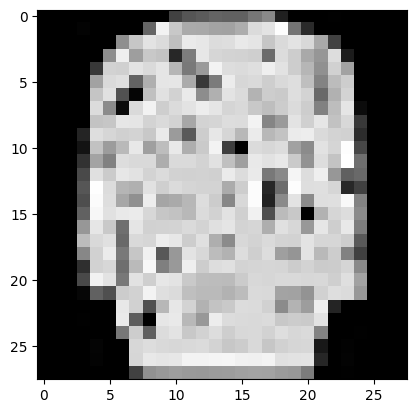

Label: Pullover


In [42]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {list((labels_map.values()))[label]}")

##Transformar

Necesitamos realizar una codificación one-hot de las clases, para lo cual utilizamos una función lambda. Inicializamos un vector que contiene todas las clases con ceros y, posteriormente, obtenemos el valor de la etiqueta 'y'. Luego, empleamos este valor para modificar el vector, estableciendo el correspondiente valor en 1. Este proceso garantiza que representemos cada clase mediante un vector binario único, esencial para tareas de clasificación.

In [43]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [44]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

#Red Neuronal

Las redes neuronales están formadas por capas de neuronas interconectadas, y estas capas se dividen generalmente en tres tipos:

Capa de Entrada (Input Layer): Esta capa recibe las señales o características de entrada y transmite esa información a las capas siguientes.

Capas Ocultas (Hidden Layers): Estas capas realizan operaciones de procesamiento intermedias. Cada neurona en una capa oculta toma entradas de las neuronas de la capa anterior, realiza operaciones y transmite resultados a la capa siguiente.

Capa de Salida (Output Layer): Esta capa produce la salida final de la red neuronal. La cantidad de neuronas en esta capa suele coincidir con la cantidad de clases en un problema de clasificación.

En una red neuronal, cada neurona realiza cálculos en su entrada y decide si "activarse" o no, es decir, si debe transmitir una señal a las neuronas en la capa siguiente. La función que toma esta decisión se llama función de activación.

La red realiza una transformación lineal de las características de entrada utilizando pesos y sesgos. En el contexto mencionado, la transformación lineal toma un vector de 784 características y lo convierte en un nuevo vector de 512 características. Este proceso implica que cada característica de entrada se multiplique por un peso correspondiente, se sume un sesgo y se obtenga el resultado.

Después de la transformación lineal, se aplica la función de activación ReLU a cada elemento del vector resultante. La función ReLU está definida como

f(x)=max(0,x). Esto significa que si el valor es positivo, se mantiene igual; si es negativo, se establece en cero. La aplicación de ReLU tiene el efecto de "activar" ciertas neuronas. Si el resultado de la transformación lineal es positivo, la neurona correspondiente se activa y transmite su salida; si es negativo, la neurona permanece inactiva y su salida es cero. Este proceso de combinación de transformación lineal y función de activación ReLU permite a la red aprender patrones y representaciones no lineales en los datos.

In [45]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [47]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


Si tienes un tensor de forma (1, 28, 28), se puede considerar como una imagen con 28 matrices, cada una con 28 entradas.

In [48]:
X = torch.rand(1, 28, 28, device=device)

In [49]:
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)

In [50]:
logits

tensor([[0.0000, 0.0000, 0.0000, 0.0034, 0.0000, 0.0206, 0.0000, 0.0000, 0.0781,
         0.0079]], grad_fn=<ReluBackward0>)

In [51]:
pred_probab = nn.Softmax(dim=1)(logits)

##Aplicaciòn del Modelo


In [52]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

###Funciòn de perdida

La pérdida de entropía cruzada evalúa cuánto divergen las predicciones del modelo de las etiquetas reales

In [53]:
loss_fn = nn.CrossEntropyLoss()

###Optimizador

Un optimizador es una herramienta que implementa un algoritmo de optimización, específicamente diseñado para ajustar los parámetros (pesos y sesgos) de un modelo de aprendizaje automático durante el entrenamiento. La optimización tiene como objetivo minimizar (o maximizar) una función de pérdida, que mide la diferencia entre las predicciones del modelo y las etiquetas reales.
Implementa el algoritmo clásico de descenso de gradiente estocástico, que ajusta los parámetros en dirección opuesta al gradiente de la función de pérdida.
El Descenso de Gradiente es un algoritmo de optimización utilizado para minimizar funciones de pérdida. La versión "estocástica" implica que, en lugar de calcular el gradiente utilizando el conjunto de datos completo, se calcula el gradiente utilizando solo una pequeña muestra (o "minibatch") de datos en cada paso de entrenamiento. Esto ayuda a acelerar el proceso de optimización y puede conducir a una convergencia más rápida.

In [54]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

##Implementacion

In [55]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [56]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [57]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298539  [    0/60000]
loss: 2.293216  [ 6400/60000]
loss: 2.293568  [12800/60000]
loss: 2.285562  [19200/60000]
loss: 2.267318  [25600/60000]
loss: 2.275199  [32000/60000]
loss: 2.267306  [38400/60000]
loss: 2.266685  [44800/60000]
loss: 2.250182  [51200/60000]
loss: 2.261928  [57600/60000]
Test Error: 
 Accuracy: 30.6%, Avg loss: 0.035313 

Epoch 2
-------------------------------
loss: 2.255335  [    0/60000]
loss: 2.257537  [ 6400/60000]
loss: 2.258028  [12800/60000]
loss: 2.214669  [19200/60000]
loss: 2.222891  [25600/60000]
loss: 2.219308  [32000/60000]
loss: 2.188735  [38400/60000]
loss: 2.167724  [44800/60000]
loss: 2.234295  [51200/60000]
loss: 2.123032  [57600/60000]
Test Error: 
 Accuracy: 37.1%, Avg loss: 0.034010 

Epoch 3
-------------------------------
loss: 2.206189  [    0/60000]
loss: 2.186994  [ 6400/60000]
loss: 2.217716  [12800/60000]
loss: 2.183631  [19200/60000]
loss: 2.157468  [25600/60000]
loss: 2.106099  [32000/600

In [58]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [59]:
x, y = test_data[0][0], test_data[0][1]

In [61]:
predecir=model(x)
predecir

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.2985, 0.0000, 0.2620, 0.8601,
         2.8408]], grad_fn=<ReluBackward0>)

In [65]:
clase_predecir=predecir[0].argmax(0)

In [68]:
clase_predecir=labels_map[predecir[0].argmax(0).item()]

In [69]:
clase_predecir

'Ankle Boot'

In [71]:
clase_real=labels_map[y]

In [72]:
clase_real

'Ankle Boot'